In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 한글 및 특정 문자 깨짐 문제 해결
import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만, - 깨짐 해결

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
# plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic' # 'batang'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('C:/workspace/wassup3/05_Data_Analysis/data/mini.csv')

In [4]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [7]:
df.set_index('target')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
target,,,,,,,,,,,,,,
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6
1,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7
1,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0
1,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1
1,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7
1,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6


In [15]:
df0 = df[df.index==0]
df0

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0


In [17]:
df0 = df.groupby('target').get_group(0)
df0

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
10,594da7eb,19,21,13.953449,135.256834,13,11,76.414481,0,4,High,Basic,2,1,0
11,b8696d56,5,28,18.474545,117.134599,9,9,97.786237,6,3,Medium,Premium,2,3,0
14,aba89783,2,27,10.303337,2.712124,20,8,82.491912,4,5,Low,Basic,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0d22254f,12,18,11.709882,40.075854,4,13,77.026299,2,2,High,Basic,2,3,0
9983,f2757504,22,23,16.739713,6.047050,15,9,64.817228,4,5,Medium,Basic,2,3,0
9987,ec7013a5,21,7,17.466408,160.590536,14,14,76.861836,4,5,Medium,Premium,2,2,0
9989,039902b7,5,23,10.607962,21.655545,9,9,57.110845,1,2,Low,Basic,1,3,0


In [18]:
df1 = df.groupby('target').get_group(1)
df1

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9ee4e40c,11,6,11.187836,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1


In [20]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
subscription_duration,3801.0,11.953959,6.618295,1.000000,6.000000,12.000000,18.000000,23.000000
recent_login_time,3801.0,15.057880,8.428730,1.000000,8.000000,15.000000,22.000000,29.000000
average_login_time,3801.0,15.026762,2.956732,3.636424,13.077376,14.979239,17.030607,26.998490
average_time_per_learning_session,3801.0,46.456986,39.639733,0.011515,14.485582,34.773346,68.298309,179.176060
monthly_active_learning_days,3801.0,12.502236,6.854200,1.000000,7.000000,13.000000,18.000000,24.000000
total_completed_courses,3801.0,12.246251,3.630554,1.000000,10.000000,12.000000,15.000000,27.000000
recent_learning_achievement,3801.0,75.000310,9.873574,35.941755,68.316764,74.981448,81.520614,107.135153
abandoned_learning_sessions,3801.0,3.087609,1.755430,0.000000,2.000000,3.000000,4.000000,11.000000
community_engagement_level,3801.0,3.870560,1.259105,1.000000,3.000000,4.000000,5.000000,5.000000
customer_inquiry_history,3801.0,2.009997,1.409145,0.000000,1.000000,2.000000,3.000000,10.000000


In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
subscription_duration,6199.0,11.862720,6.590500,1.000000,6.000000,12.000000,18.000000,23.000000
recent_login_time,6199.0,14.985804,8.322310,1.000000,8.000000,15.000000,22.000000,29.000000
average_login_time,6199.0,14.974035,3.029275,2.366189,12.976618,14.979217,16.964874,26.284396
average_time_per_learning_session,6199.0,60.105533,63.477523,0.013535,15.908562,39.705116,80.159683,503.372616
monthly_active_learning_days,6199.0,12.571866,6.980077,1.000000,7.000000,12.000000,19.000000,24.000000
total_completed_courses,6199.0,12.216003,3.636558,2.000000,10.000000,12.000000,15.000000,27.000000
recent_learning_achievement,6199.0,75.047419,10.027058,36.115562,68.249866,75.199591,81.867694,112.643828
abandoned_learning_sessions,6199.0,3.016616,1.754416,0.000000,2.000000,3.000000,4.000000,12.000000
community_engagement_level,6199.0,3.895628,1.264061,1.000000,3.000000,4.000000,5.000000,5.000000
customer_inquiry_history,6199.0,2.010808,1.428306,0.000000,1.000000,2.000000,3.000000,8.000000


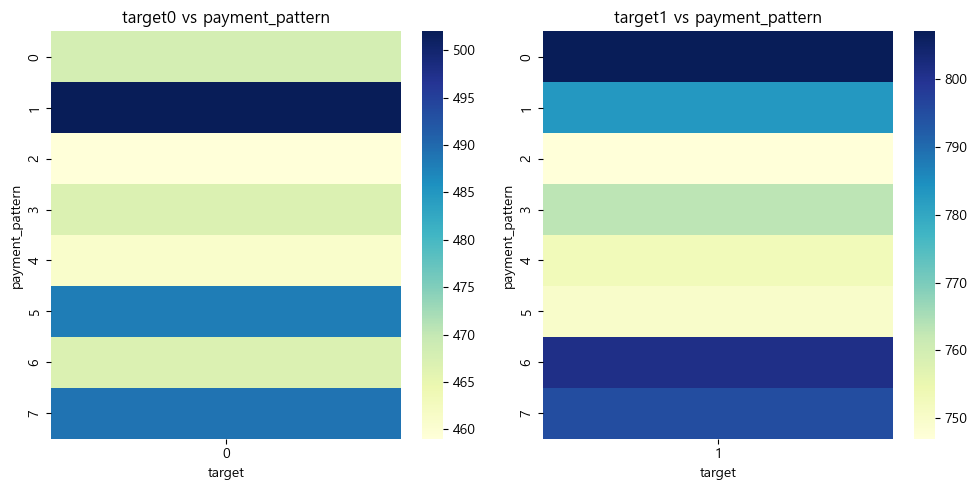

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(pd.crosstab(df0.payment_pattern, df0.target), cmap="YlGnBu", ax=axes[0])
axes[0].set_title('target0 vs payment_pattern')

sns.heatmap(pd.crosstab(df1.payment_pattern, df1.target), cmap="YlGnBu", ax=axes[1])
axes[1].set_title('target1 vs payment_pattern')

plt.tight_layout()
plt.show()


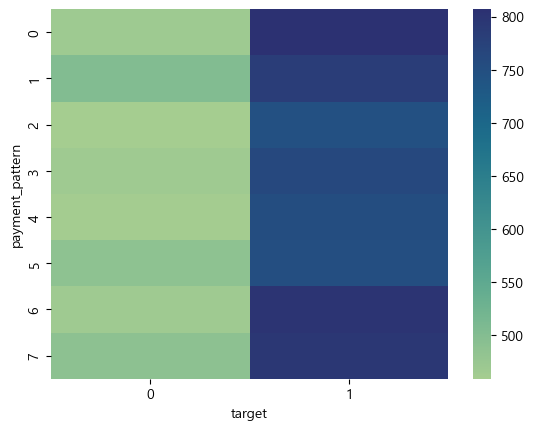

In [68]:
sns.heatmap(pd.crosstab(df.payment_pattern, df.target), cmap="crest")
plt.show()


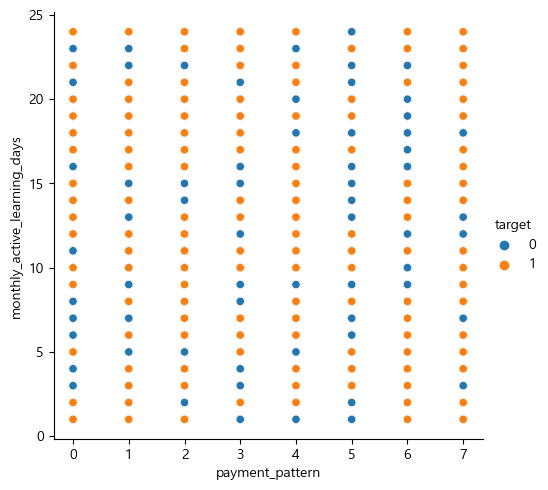

In [39]:
sns.relplot(data=df, x='payment_pattern', y='monthly_active_learning_days', hue="target")